In [508]:
from google.colab import drive
drive.mount('/content/drive') # permiso de acceso a las carpetas de google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Creando Frames
##Frame 1

In [510]:
from operator import index
df_1 =pd.read_csv('/content/drive/My Drive/Colab Notebooks/tesis-jhonatan/serie-tiempo-V2csv.csv',parse_dates=True, index_col=0 )
df_1 = df_1.rename(columns={"MW-H":"consumo"})

print(df_1.head())
df_1.shape

                     consumo
FECHA                       
2018-01-01 00:00:00     4.95
2018-01-01 00:15:00     4.95
2018-01-01 00:30:00     4.91
2018-01-01 00:45:00     4.78
2018-01-01 01:00:00     4.51


(128544, 1)

In [511]:
#convirtiendo a datetime
#df_01["FECHA"]=pd.to_datetime(df.index)
df_1.index


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:15:00',
               '2018-01-01 00:30:00', '2018-01-01 00:45:00',
               '2018-01-01 01:00:00', '2018-01-01 01:15:00',
               '2018-01-01 01:30:00', '2018-01-01 01:45:00',
               '2018-01-01 02:00:00', '2018-01-01 02:15:00',
               ...
               '2021-08-31 21:30:00', '2021-08-31 21:45:00',
               '2021-08-31 22:00:00', '2021-08-31 22:15:00',
               '2021-08-31 22:30:00', '2021-08-31 22:45:00',
               '2021-08-31 23:00:00', '2021-08-31 23:15:00',
               '2021-08-31 23:30:00', '2021-08-31 23:45:00'],
              dtype='datetime64[ns]', name='FECHA', length=128544, freq=None)

In [512]:
df_1.dtypes

consumo    float64
dtype: object

In [513]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128544 entries, 2018-01-01 00:00:00 to 2021-08-31 23:45:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   consumo  128544 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


## Frame 2

In [514]:
#Extraer tiempo desde las 00 h hasta las 23:45
#horas = df_1.index.time[0:96]
horas=["00:00"	,"00:15"	,"00:30","00:45",	"01:00",	"01:15",	"01:30",	"01:45",	"02:00",	"02:15",	"02:30",	"02:45",	"03:00",	"03:15",	"03:30",	"03:45",	"04:00",	"04:15",	"04:30",	"04:45",	"05:00","05:15",	"05:30",	"05:45"	,"06:00",	"06:15",	"06:30",	"06:45",	"07:00",	"07:15",	"07:30","07:45",	"08:00",	"08:15",	"08:30",	"08:45",	"09:00",	"09:15",	"09:30",	"09:45","10:00","10:15","10:30","10:45","11:00","11:15","11:30","11:45","12:00","12:15","12:30","12:45","13:00","13:15","13:30","13:45","14:00",	"14:15",	"14:30",	"14:45",	"15:00",	"15:15",	"15:30",	"15:45",	"16:00",	"16:15",	"16:30",	"16:45",	"17:00",	"17:15"	,"17:30",	"17:45",	"18:00","18:15",	"18:30",	"18:45",	"19:00",	"19:15",	"19:30",	"19:45","20:00",	"20:15",	"20:30",	"20:45",	"21:00",	"21:15",	"21:30",	"21:45"	,"22:00",	"22:15",	"22:30",	"22:45",	"23:00",	"23:15",	"23:30"	,"23:45"]

# Array de MW-H 
array = np.array(df_1["consumo"])
array = array.reshape(1339,96)

# serie de 1339 dias
date = pd.date_range("2018-01-01",periods=1339 ,freq="d")

# Frame 2
df_2 = pd.DataFrame(array,index=date,columns=horas )

df_2 = df_2.rename_axis('FECHA')

df_2.head()

,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,02:30,02:45,03:00,03:15,03:30,03:45,04:00,04:15,04:30,04:45,05:00,05:15,05:30,05:45,06:00,06:15,06:30,06:45,07:00,07:15,07:30,07:45,08:00,08:15,08:30,08:45,09:00,09:15,09:30,09:45,...,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
FECHA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,4.95,4.95,4.91,4.78,4.51,4.24,3.94,3.59,3.32,3.11,2.96,2.85,2.76,2.69,2.66,2.65,2.64,2.63,2.64,2.64,2.67,2.66,2.53,2.10,2.09,2.13,2.20,2.26,2.33,2.41,2.47,2.52,2.57,2.60,2.63,2.67,2.69,2.73,2.77,2.79,...,2.60,2.60,2.60,2.60,2.59,2.58,2.57,2.57,2.55,2.54,2.55,2.59,2.65,2.89,3.19,3.49,3.90,4.43,4.76,4.53,4.94,5.11,5.19,5.18,5.15,5.08,4.97,4.83,4.72,4.54,4.41,4.26,4.08,3.85,3.65,3.51,3.35,3.20,3.05,2.93
2018-01-02,2.82,2.70,2.56,2.51,2.46,2.41,2.38,2.36,2.33,2.30,2.27,2.25,2.25,2.26,2.29,2.28,2.29,2.31,2.33,2.37,2.44,2.43,2.25,2.02,2.08,2.21,2.33,2.47,2.57,2.67,2.76,2.82,2.92,2.98,3.11,3.21,3.27,3.34,3.40,3.42,...,3.39,3.48,3.57,3.61,3.66,3.76,3.84,3.88,3.87,3.91,3.95,3.97,4.00,4.12,4.36,4.57,4.73,5.11,5.61,5.84,5.96,6.04,6.07,6.09,6.05,5.99,5.85,5.68,5.51,5.31,5.10,4.76,4.47,4.19,3.92,3.68,3.46,3.21,3.00,2.84
2018-01-03,2.69,2.57,2.49,2.43,2.35,2.30,2.27,2.23,2.21,2.19,2.17,2.16,2.15,2.15,2.17,2.21,2.24,2.28,2.33,2.39,2.45,2.51,2.40,2.20,2.27,2.40,2.57,2.70,2.82,2.88,2.96,3.07,3.13,3.23,3.34,3.46,3.58,3.59,3.66,3.71,...,3.65,3.72,3.75,3.81,3.89,3.96,4.01,4.00,4.05,4.11,4.19,4.24,4.25,4.30,4.38,4.57,4.90,5.22,5.74,6.07,6.26,6.38,6.37,6.31,6.24,6.14,6.00,5.85,5.72,5.42,5.19,4.89,4.55,4.26,3.95,3.71,3.44,3.19,2.95,2.81
2018-01-04,2.68,2.59,2.46,2.38,2.32,2.27,2.24,2.22,2.20,2.18,2.18,2.17,2.17,2.17,2.21,2.22,2.26,2.31,2.36,2.39,2.45,2.53,2.56,2.35,2.31,2.43,2.62,2.79,2.91,2.99,3.10,3.19,3.28,3.40,3.53,3.64,3.71,3.79,3.84,3.87,...,3.82,3.87,3.94,4.05,4.09,4.11,4.06,4.06,4.09,4.10,4.11,4.05,4.06,4.10,4.11,4.15,4.26,4.56,5.28,5.88,6.12,6.21,6.26,6.26,6.24,6.17,6.04,5.93,5.77,5.51,5.27,4.97,4.65,4.34,4.01,3.68,3.42,3.17,2.96,2.78
2018-01-05,2.62,2.51,2.42,2.34,2.27,2.23,2.18,2.14,2.11,2.09,2.08,2.08,2.08,2.09,2.13,2.16,2.19,2.22,2.24,2.35,2.43,2.46,2.17,2.16,2.34,2.48,2.67,2.82,2.92,3.00,3.08,3.16,3.22,3.27,3.43,3.57,3.65,3.72,3.78,3.79,...,3.54,3.61,3.69,3.80,3.86,3.86,3.87,3.88,3.92,3.92,3.89,3.98,4.07,4.10,4.14,4.21,4.41,4.83,5.50,5.79,6.01,6.14,6.17,6.16,6.11,6.03,5.90,5.77,5.63,5.42,5.13,4.84,4.55,4.25,3.94,3.66,3.41,3.22,3.05,2.88


In [515]:
df_2.dtypes

00:00    float64
00:15    float64
00:30    float64
00:45    float64
01:00    float64
          ...   
22:45    float64
23:00    float64
23:15    float64
23:30    float64
23:45    float64
Length: 96, dtype: object

In [516]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1339 entries, 2018-01-01 to 2021-08-31
Freq: D
Data columns (total 96 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   00:00   1339 non-null   float64
 1   00:15   1339 non-null   float64
 2   00:30   1339 non-null   float64
 3   00:45   1339 non-null   float64
 4   01:00   1339 non-null   float64
 5   01:15   1339 non-null   float64
 6   01:30   1339 non-null   float64
 7   01:45   1339 non-null   float64
 8   02:00   1339 non-null   float64
 9   02:15   1339 non-null   float64
 10  02:30   1339 non-null   float64
 11  02:45   1339 non-null   float64
 12  03:00   1339 non-null   float64
 13  03:15   1339 non-null   float64
 14  03:30   1339 non-null   float64
 15  03:45   1339 non-null   float64
 16  04:00   1339 non-null   float64
 17  04:15   1339 non-null   float64
 18  04:30   1339 non-null   float64
 19  04:45   1339 non-null   float64
 20  05:00   1339 non-null   float64
 21  05:15   133

#2.Exploración de datos

In [517]:
#Estadisticas de los datos
df_1.describe()

,consumo
count,128544.000000
mean,3.681590
std,1.165581
min,0.000000
25%,2.650000
50%,3.590000
75%,4.250000
max,7.040000


In [518]:
df_2.describe()

,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,02:30,02:45,03:00,03:15,03:30,03:45,04:00,04:15,04:30,04:45,05:00,05:15,05:30,05:45,06:00,06:15,06:30,06:45,07:00,07:15,07:30,07:45,08:00,08:15,08:30,08:45,09:00,09:15,09:30,09:45,...,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45,16:00,16:15,16:30,16:45,17:00,17:15,17:30,17:45,18:00,18:15,18:30,18:45,19:00,19:15,19:30,19:45,20:00,20:15,20:30,20:45,21:00,21:15,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.00000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,...,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,2.779791,2.673368,2.584966,2.513189,2.454122,2.404317,2.363264,2.331546,2.306243,2.286348,2.271359,2.260695,2.252255,2.253876,2.271718,2.29298,2.314361,2.351561,2.397625,2.452868,2.507916,2.545639,2.576475,2.609261,2.607521,2.578245,2.646199,2.784473,2.904750,2.983719,3.062196,3.127058,3.183585,3.262353,3.387334,3.507184,3.615385,3.701949,3.772771,3.821912,...,3.644406,3.705564,3.775400,3.831158,3.866191,3.887528,3.910381,3.937058,3.963637,3.984152,4.012644,4.052166,4.105751,4.190022,4.389761,4.793428,5.251262,5.587117,5.853144,6.011471,6.083906,6.117685,6.105041,6.059903,5.986131,5.874884,5.731471,5.600463,5.441845,5.231718,5.003637,4.775646,4.525743,4.247513,3.981889,3.731875,3.473406,3.244877,3.050724,2.901464
std,0.190526,0.189973,0.187338,0.178972,0.167138,0.153792,0.139323,0.124852,0.114263,0.106124,0.100523,0.097260,0.094862,0.092661,0.090528,0.09141,0.093354,0.095373,0.100239,0.107180,0.114916,0.128438,0.177960,0.220762,0.241115,0.240760,0.268616,0.302323,0.311977,0.313445,0.302241,0.288787,0.285312,0.313626,0.360593,0.399137,0.430558,0.454018,0.473602,0.483124,...,0.400452,0.423873,0.453446,0.475608,0.489311,0.495778,0.491824,0.501251,0.511123,0.516055,0.511955,0.514550,0.525085,0.537120,0.586339,0.711271,0.764114,0.700109,0.550871,0.448438,0.409681,0.393637,0.382089,0.375177,0.370972,0.365510,0.361722,0.354318,0.348865,0.344562,0.336044,0.327837,0.310644,0.285089,0.260828,0.235133,0.212645,0.199239,0.192162,0.184767
min,2.290000,2.200000,2.140000,2.070000,2.050000,2.030000,2.010000,1.980000,1.910000,1.870000,1.850000,1.860000,1.860000,1.870000,1.890000,1.94000,1.970000,2.000000,2.050000,2.080000,2.110000,2.110000,1.950000,1.950000,1.710000,1.640000,1.650000,1.640000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000,2.710000,2.150000,3.100000,3.260000,3.870000,4.450000,4.730000,4.500000,4.770000,4.460000,4.500000,4.500000,4.270000,4.230000,4.180000,4.040000,3.860000,3.580000,2.870000,3.090000,3.170000,3.020000,2.790000,2.610000,2.470000,2.380000
25%,2.690000,2.590000,2.500000,2.430000,2.380000,2.330000,2.290000,2.260000,2.240000,2.220000,2.210000,2.200000,2.190000,2.195000,2.220000,2.24000,2.260000,2.310000,2.360000,2.410000,2.470000,2.490000,2.450000,2.440000,2.420000,2.420000,2.470000,2.570000,2.680000,2.770000,2.895000,3.000000,3.070000,3.150000,3.265000,3.375000,3.490000,3.570000,3.640000,3.700000,.

##2.1 Preprocesamiento de datos
Para la ejecución del preprocesamiento de datos se utiliza la 
información de los años (2018, 2019, 2021, 2022-agosto)

In [519]:
# Funcion para realizar graficas
def grafica(df1,df2,df3,df4,titulo,a,b,c,d):
  #------------array de minutos--------------  
  array_horas = [0]
  for i in range(0,24,1):
    for num in range(0,3 ):
      i = i+ 0.15
      array_horas.append(i)
      if  num==2:
        array_horas.append((i-0.45)+1 )
  array_horas.pop(96)
  horas = np.array(array_horas)

  #--------plot----------------
  fig1,ax=plt.subplots(2,2)
  fig1.set_size_inches(15,13)

  array=[len(df1),len(df2),len(df3), len(df4) ]
  array2 =[df1,df2,df3,df4]
  x = 0
  for i in array:
    for j in range(0,i):
      if x==0:
        ax[0,0].plot(  horas, array2[x].iloc[j,0:96] )   
      elif x==1:
        ax[0,1].plot(  horas, array2[x].iloc[j,0:96] ) 
      elif x==2:
        ax[1,0].plot(  horas, array2[x].iloc[j,0:96] )   
      elif x==3:
        ax[1,1].plot(  horas, array2[x].iloc[j,0:96] )   

    x=x+1
      
  plt.xlabel("Horas")
  plt.ylabel('Potencia (MW-H)')
  ax[0,0].set_title(a)
  ax[0,1].set_title(b)
  ax[1,0].set_title(c)
  ax[1,1].set_title(d)
    
  plt.suptitle(f' {titulo}',fontsize=20)
  #fig.tight_layout()
  



Grafica de la serie de tiempo de la demanda de energía eléctrica, para una mejor vista se presentan solo 10 dias

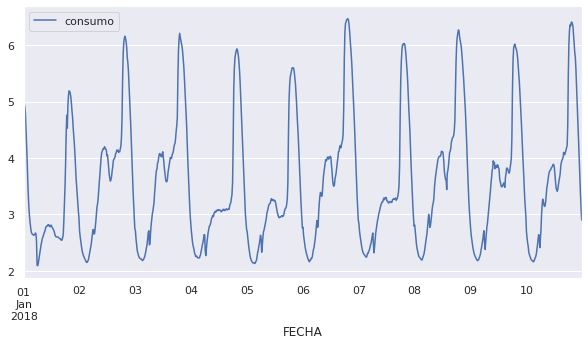

In [520]:
import seaborn as sbn
sbn.set(rc={'figure.figsize':(10,5)})
#df_1.iloc[0:97,0].plot()
df_1.loc["2018-01-01" :"2018-01-10"].plot()

Con el fin de analizar la demanda de energía eléctrica se graficó el perfil de demanda diario de toda la 
serie de tiempo en un periodo de 24 horas, donde se evidenció que la hora de mayor consumo (hora 
pico) es a las 20H00, ademas se puede ver mejor los datos atipicos o faltantes.

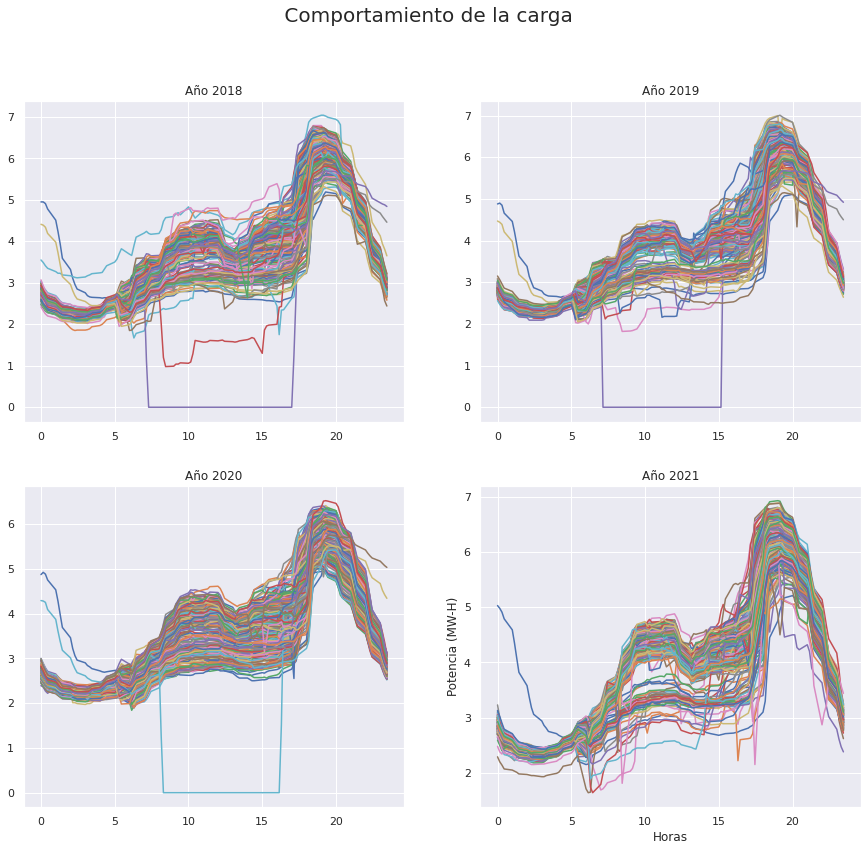

In [521]:
titulo = "Comportamiento de la carga "
a="Año 2018"
b="Año 2019"
c="Año 2020"
d="Año 2021"
grafica(df_2.loc["2018"],df_2.loc["2019"],df_2.loc["2020"],df_2.loc["2021"],titulo,a,b,c,d )

Para determinar la distribución de frecuencias de los valores contenidos en la serie de tiempo demanda 
eléctrica se utilizó el histograma, además de que es una primera representación gráfica o panorama de 
la distribución de los datos de consumo de energía eléctrica. 
Se aprecia una distribución bimodal

,consumo
count,35040.000000
mean,3.681093
std,1.183532
min,0.000000
25%,2.660000
50%,3.590000
75%,4.180000
max,7.040000


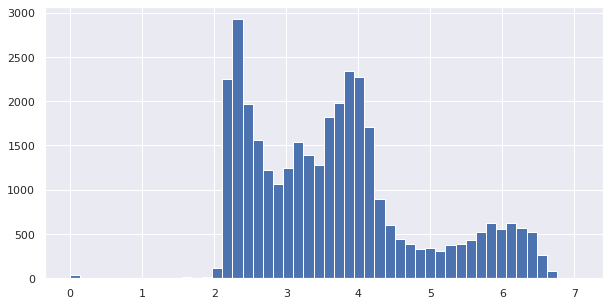

In [522]:
hist=plt.hist(df_1.loc["2018",df_1.columns[0]] ,bins=50)
df_1["2018"].describe()

##2.2 Detección y tratamiento de datos perdidos y atipicos
Los valores perdidos al principio o fin de una serie de tiempo no suponen un problema especial; 
sencillamente acortan la longitud de la serie, en tanto que las discontinuidades que aparecen en la mitad 
de una serie (datos incrustados perdido) pueden ser problemas mucho más graves. 

### Datos perdidos
Se encontraron 104 valores perdidos

In [523]:
df_1[df_1["consumo"]==0]

,consumo
FECHA,
2018-04-15 07:30:00,0.0
2018-04-15 07:45:00,0.0
2018-04-15 08:00:00,0.0
2018-04-15 08:15:00,0.0
2018-04-15 08:30:00,0.0
...,...
2020-11-15 15:15:00,0.0
2020-11-15 15:30:00,0.0
2020-11-15 15:45:00,0.0


### Datos atipicos
Tratamiento de datos atipicos, se procedera a ralizar un diagrama de cajas, metodo de los cuartiles y prueba de Grubbs

####Diagrama de cajas
Se puede evidenciar que existen valores atipicos en los años 2018, 2019 y 2020

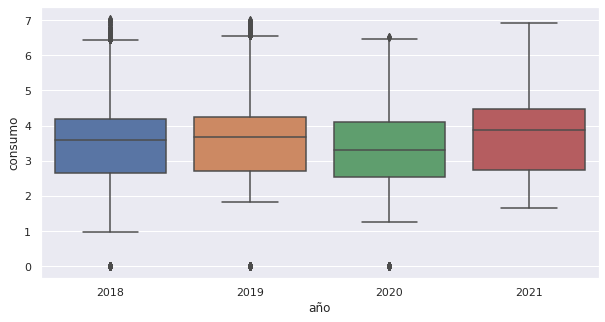

In [524]:
df_años = df_1.copy()
df_años["año"]=df_años.index.year
df_años = df_años.rename(columns={"MW-H":"consumo"})

sbn.set(rc={'figure.figsize':(10, 5)})
sbn.boxplot(data=df_años, x='año', y='consumo')

In [525]:
Q1=df_1.loc["2018","consumo"].quantile(0.25)
print("Primer Cuartil",Q1)

Q3 = df_1.loc["2018","consumo"].quantile(0.75)
print("Terce Cuartil",Q3)

IQR = Q3-Q1
print("Rango Intercuartil",IQR)

mediana = df_1.loc["2018","consumo"].median()
print("Mediana",mediana)

minimo = df_1.loc["2018","consumo"].min()
print("Valor minimo",minimo)

maximo = df_1.loc["2018","consumo"].max()
print("Valor máximo",maximo)

Primer Cuartil 2.66
Terce Cuartil 4.18
Rango Intercuartil 1.5199999999999996
Mediana 3.59
Valor minimo 0.0
Valor máximo 7.04


In [526]:
#Calculo de los bigotes inferior y superior
BI_calculado=(Q1 - 1.5*IQR)
print("BI calculado",BI_calculado)

BS_calculado=(Q3 + 1.5*IQR)
print("BI calculado",BS_calculado)

BI calculado 0.3800000000000008
BI calculado 6.459999999999999


In [527]:
df_2018 = pd.DataFrame(df_1["2018"] ) # dataframe año 2018

# valores atipicos año 2018
atipicos_2018=df_1_2018[(df_1_2018["consumo"]<BI_calculado) |(df_1_2018["consumo"]> BS_calculado)]
atipicos_2018

,consumo
FECHA,
2018-05-03 19:15:00,6.48
2018-05-03 19:30:00,6.50
2018-07-03 18:45:00,6.57
2018-07-03 19:00:00,6.65
2018-07-03 19:15:00,6.67
...,...
2018-11-13 19:30:00,6.52
2018-11-13 19:45:00,6.47
2018-11-15 19:15:00,6.48


In [528]:
#ordenar
atipicos_2018.sort_values("consumo")

,consumo
FECHA,
2018-04-15 12:15:00,0.00
2018-04-15 12:30:00,0.00
2018-04-15 07:30:00,0.00
2018-04-15 12:00:00,0.00
2018-04-15 11:45:00,0.00
...,...
2018-04-20 18:45:00,6.97
2018-04-20 19:45:00,6.99
2018-04-20 19:30:00,7.02


In [529]:
# no atipicos
# la suma de los datos atipicos y no-atipicos deber ser igual a la cantidad de datos del 2018 (460 + 35040 = 35040 ), lo cual se cumple
no_atipicos_2018 = df_1_2018[(df_1_2018["consumo"]>=BI_calculado) & (df_1_2018["consumo"] <= BS_calculado)]
no_atipicos_2018

,consumo
FECHA,
2018-01-01 00:00:00,4.95
2018-01-01 00:15:00,4.95
2018-01-01 00:30:00,4.91
2018-01-01 00:45:00,4.78
2018-01-01 01:00:00,4.51
...,...
2018-12-31 22:45:00,5.04
2018-12-31 23:00:00,4.93
2018-12-31 23:15:00,4.90


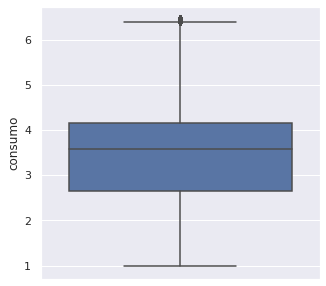

In [530]:
sbn.set(rc={'figure.figsize':(5, 5)})
sbn.boxplot(data=no_atipicos_2018 ,y="consumo")

In [531]:
no_atipicos_2018.describe()

,consumo
count,34580.000000
mean,3.650168
std,1.141038
min,0.980000
25%,2.650000
50%,3.570000
75%,4.150000
max,6.450000


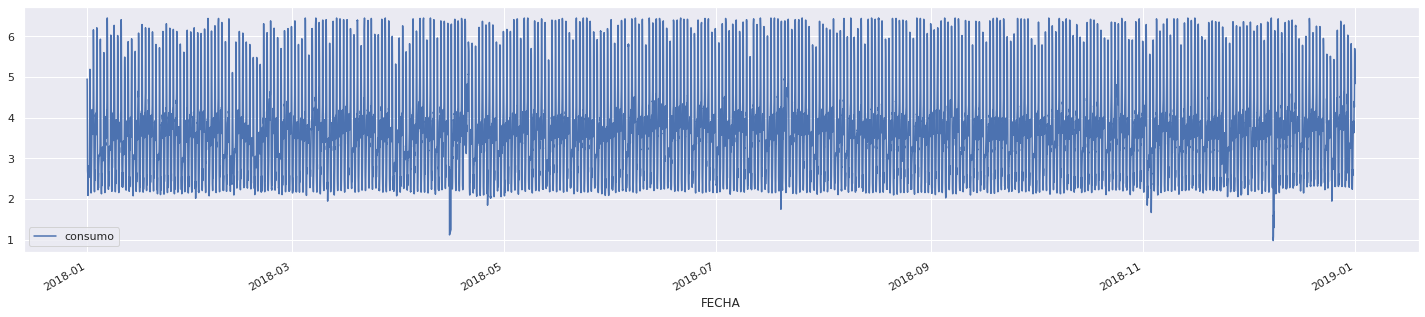

In [532]:
sbn.set(rc={'figure.figsize':(25, 5)})
no_atipicos_2018.plot()


<function matplotlib.pyplot.show>

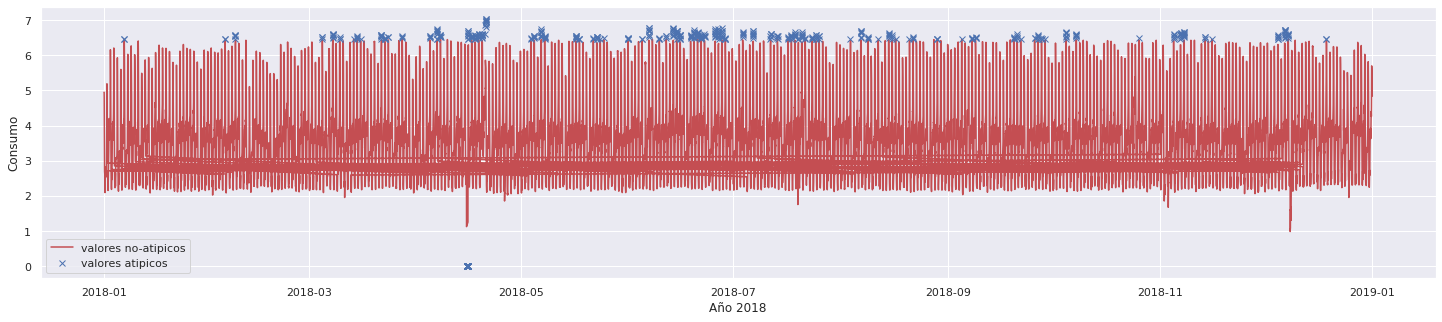

In [533]:
plt.plot( no_atipicos_2018,'r',label="valores no-atipicos" )
plt.plot( atipicos_2018,'bx',label="valores atipicos" )
plt.xlabel("Año 2018")
plt.ylabel('Consumo')
plt.legend()
plt.show